Мы с вами уже знакомы с различными функциями, которые так или иначе изменяют выводимые данные. К примеру, с агрегатными. Но бывают случаи, когда одного уровня агрегации нам недостаточно.

Допустим, у нас есть таблица с данными о продажах в кофейне. Таблица содержит список транзакций, которые объединены в чеки через общий Id. Иначе говоря, таблица содержит список позиций, приобретённых по каждому чеку.

Нам необходимо посчитать сумму среднего чека за день. Но сделать это напрямую мы не можем, потому что у нас представлены данные с уровнями детализации вида: день → чек → транзакция. Если мы сразу посчитаем AVG с группировкой по дате транзакции, то получим среднюю сумму транзакции, а она нам не нужна, нам нужен более высокий уровень агрегации — чек, который может содержать одну или несколько транзакций.

Здесь-то и возникает необходимость посчитать агрегацию из агрегации: сначала посчитать суммы чеков (не транзакций), а затем — среднее из этих сумм.

Сделать это можно как раз с помощью подзапросов и общих табличных выражений (или CTE). Именно их разбору и посвящён настоящий модуль.

Вообще, есть немало функций, кроме агрегатных, которые требуют, чтобы их обернули в подзапрос или CTE. Подзапросы встречаются довольно часто, поэтому очень важно понимать, как они работают и как их использовать.

Каждый модуль мы начинаем с изучения датасета.

Навыки построения подзапросов будем оттачивать с помощью данных о продажах в кофейне. Информация хранится в таблицах sql.coffeeshop_sales, sql.coffeeshop_custs, sql.coffeeshop_products, которые вы найдёте в Metabase.

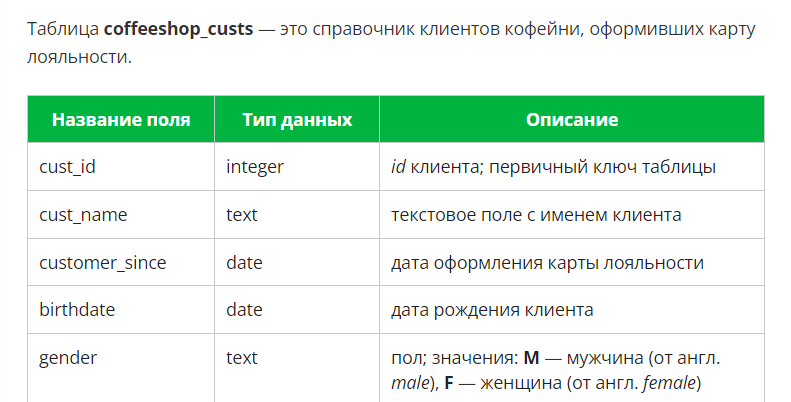

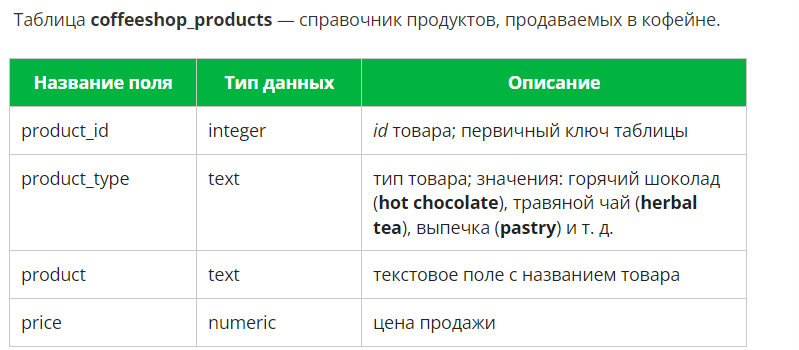

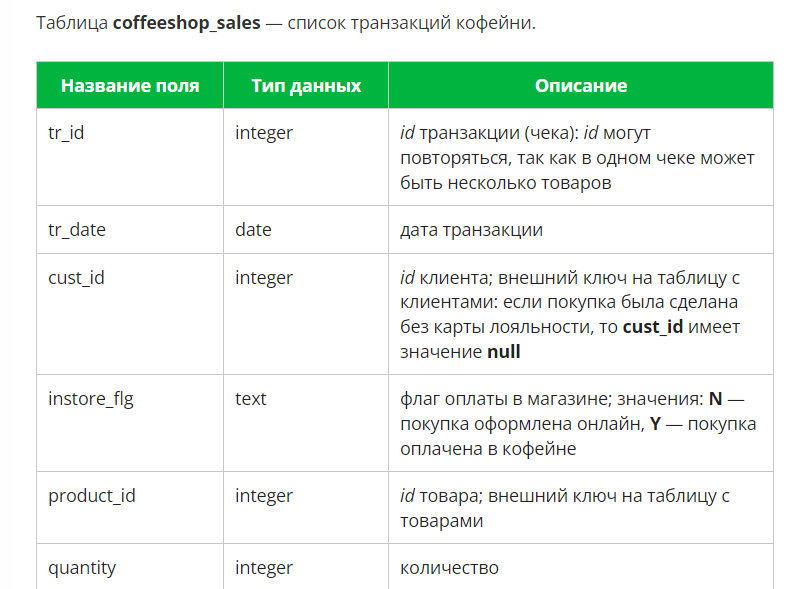

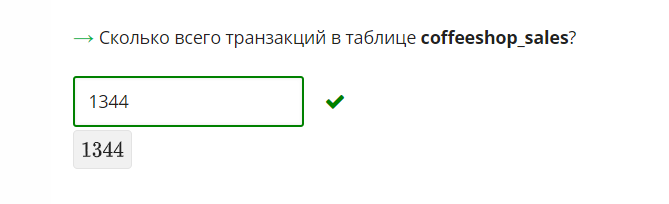

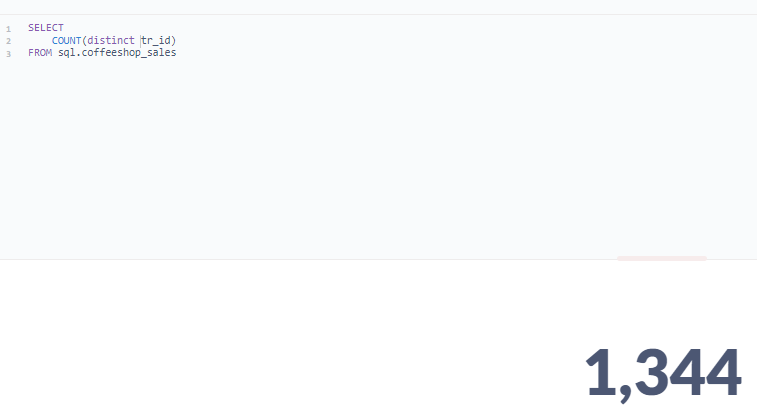

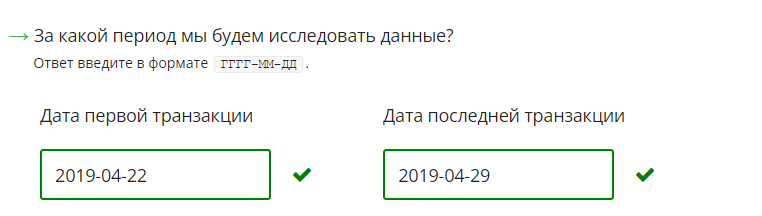

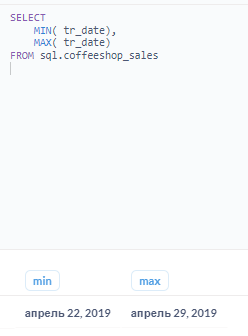

Напишите запрос, чтобы вычислить, сколько клиентов совершили покупки за всё время.

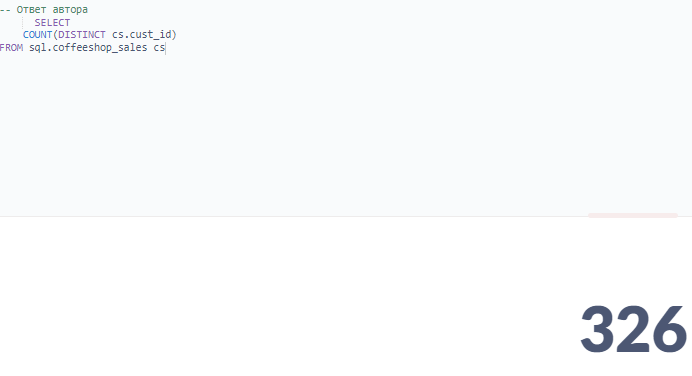

Составьте для отдела маркетинга список товаров, которые ни разу не покупали.Отсортируйте список в алфавитном порядке.

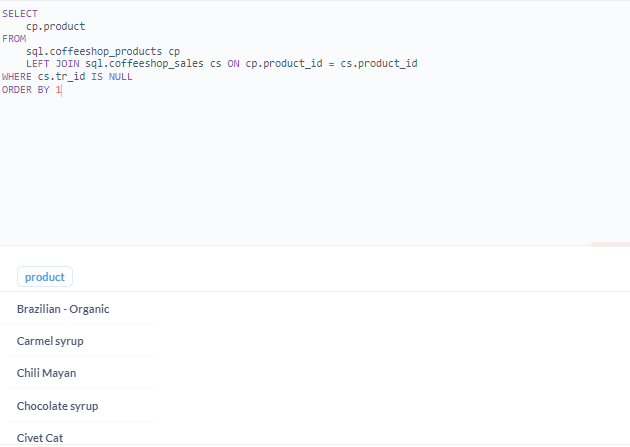

Бухгалтерии необходимо предоставить данные об общей сумме продаж за всё время. Напишите запрос, с помощью которого можно решить эту задачу. Чтобы получить сумму покупки, нужно умножить количество товара (quantity) на цену товара
(price).

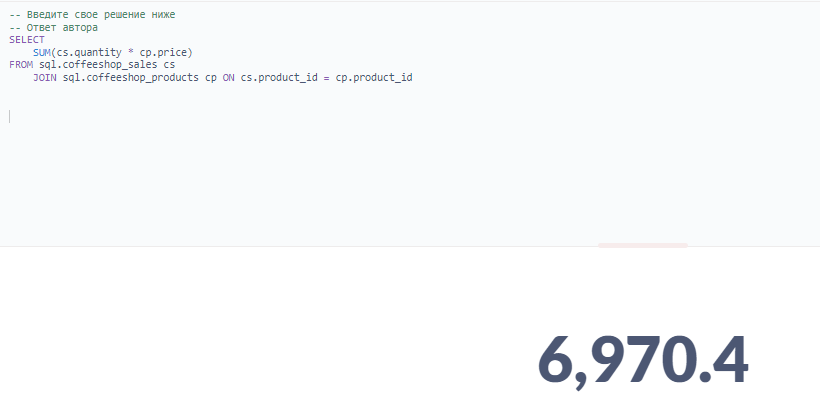

Абсолютно любой запрос можно обернуть и сделать из него подзапрос. Давайте попробуем

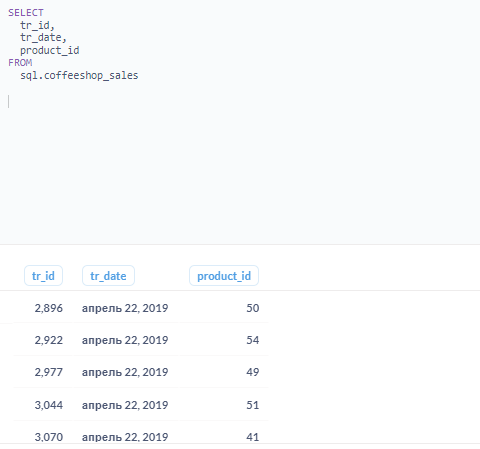

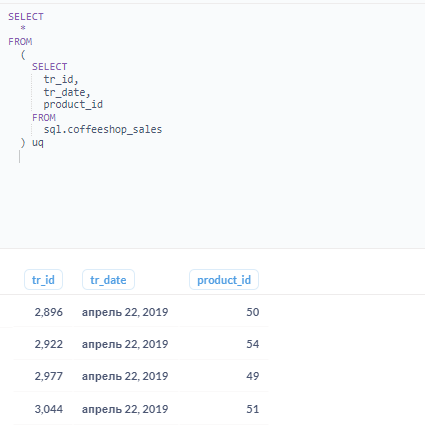

Вуаля! Подзапрос готов!

С точки зрения работы, он бесполезен, так как слишком сложный и необходимости в нём нет, но он выполняется и выполняется корректно. Этого достаточно, чтобы понять основной принцип создания подзапросов: добавляем скобки, дописываем SELECT FROM и добавляем алиас для содержимого скобок.

Важно! Для подзапросов SELECT FROM SELECT обязательно нужно указывать алиасы.

Алиасы обязательны, чтобы SQL знал, каким образом можно обратиться к внутренней таблице-подзапросу.

Помимо *, во внешнем SELECT можно указать любые поля. То есть из подзапроса мы можем вытащить «наружу» всё, что считаем нужным. А что-то, наоборот, можем оставить только в нём.

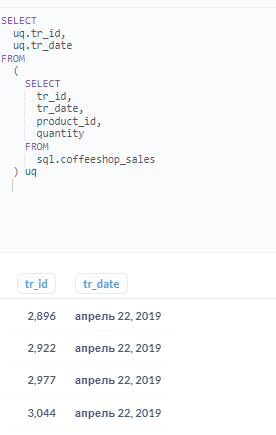

Если для колонок указаны алиасы, то обращаться к этим колонкам необходимо исключительно по алиасам.

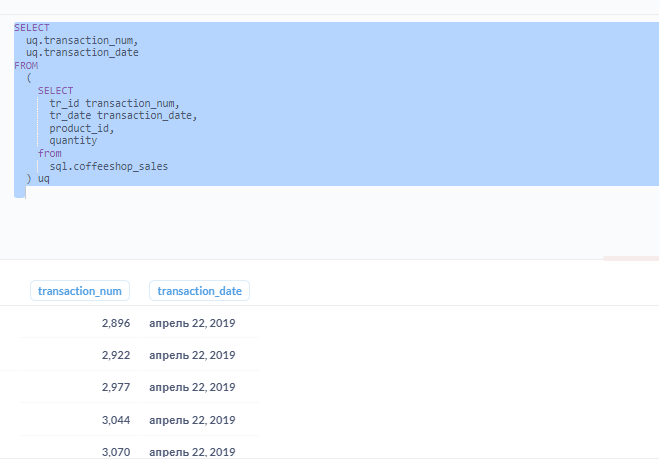

Вообще, если вы сомневаетесь, как обратиться к той или иной колонке или как использовать подзапрос, вы всегда можете выделить мышью непосредственно подзапрос — содержимое скобок — и выполнить только его.



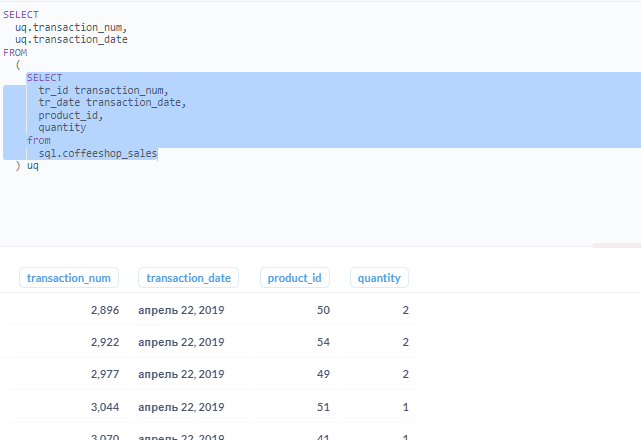

Так вы поймёте, с какой конкретно временной таблицей имеете дело и как она выглядит для внешних запросов.

Теперь попробуем написать что-то полезное.

Допустим, мы хотим посчитать среднюю выручку по дням.

Для начала нужно определить сумму выручки за каждый день, а потом взять от неё среднее. Чтобы было интереснее, возьмём только те суммы, что больше 800 у.е.

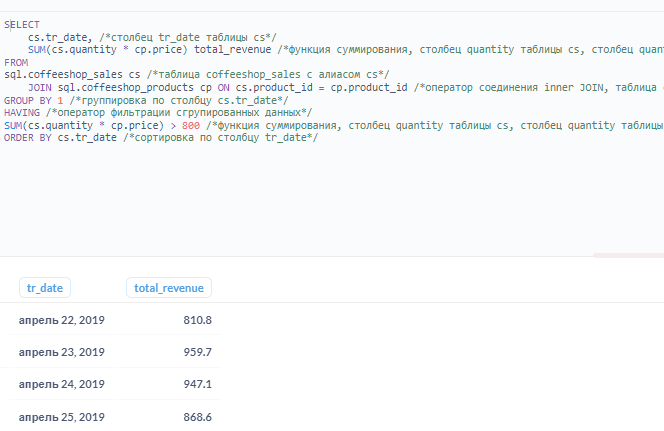

Теперь просто обернём его в скобки, добавим SELECT * FROM и алиас.

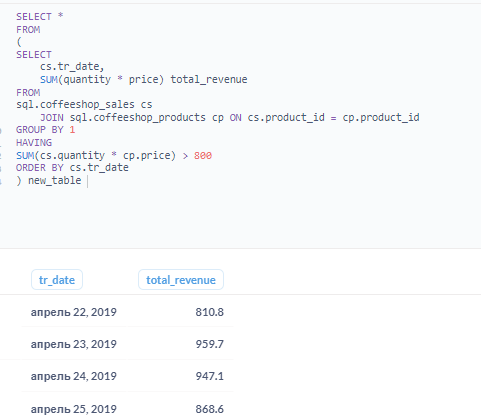

В разделе FROM в скобках можно написать любой запрос, после чего в разделе SELECT — обращаться ко всем его полям, как если бы new_table была таблицей, существующей в структуре базе данных. По сути, с помощью запроса мы создали новую таблицу и использовали её в качестве источника данных.

Важно! Созданные с помощью подзапросов таблицы существуют только в момент выполнения запроса.
Логика следующая: сначала выполняется подзапрос, из него формируется таблица, затем выполняется «внешняя часть» запроса, после чего таблица подзапроса удаляется из памяти базы данных.



Вернёмся к нашей задаче.

Теперь, когда у нас есть готовая сумма продаж за день, посчитаем среднюю сумму продаж за день. Ведь именно это нам и было нужно изначально.

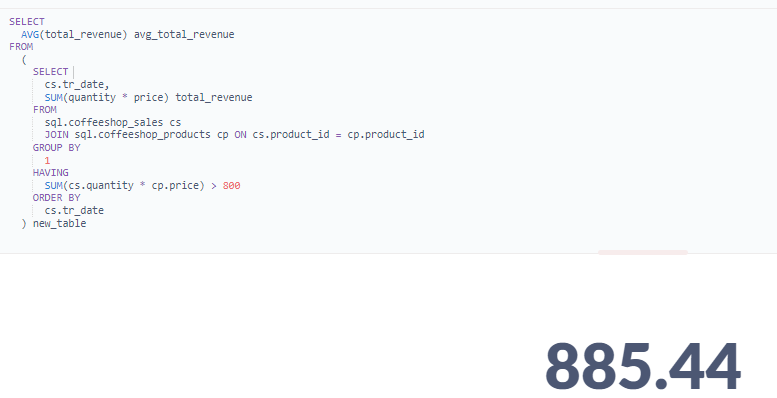

Чтобы посчитать AVG, мы обратились к алиасу колонки суммы продаж за день, так как для внешней среды она уже называется именно так — total_revenue.

Ради интереса посчитаем  максимальную сумму продаж за день. То есть найдём самую большую сумму денег, которую за день принесла кофейня.

Сделать это просто: достаточно в изначальном запросе поменять функцию среднего на максимум и убрать условие фильтрации сумм от 800 у. е.

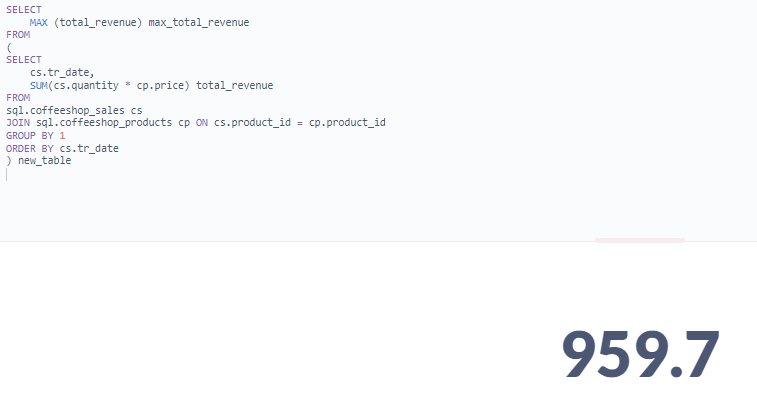

Для этого уберём агрегатную функцию и сделаем сортировку от большего к меньшему. Искомая сумма должна оказаться вверху.

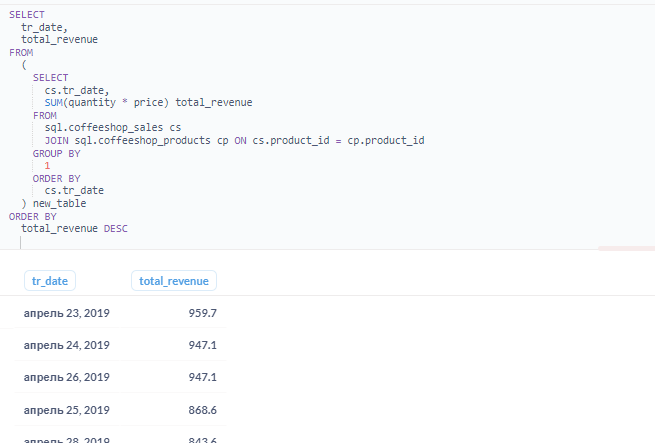

Так и есть. Как видим, 23 апреля были самые большие продажи в кофейне, они составили 959.7 — именно такой результат мы получили в предыдущем запросе.

Посчитайте среднее количество товаров в чеке за каждый день.Отсортируйте запрос по столбцу с датой.

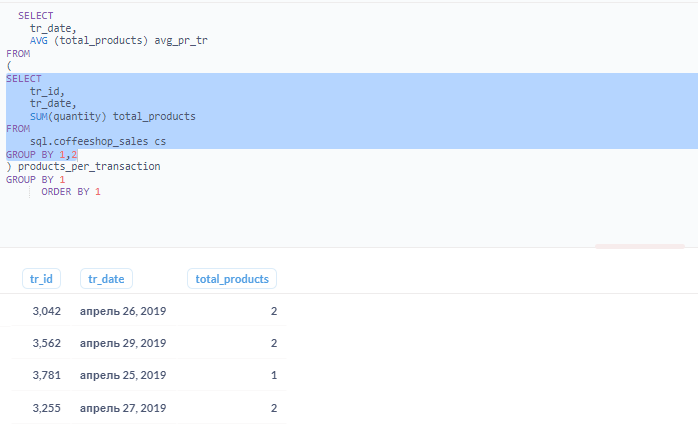

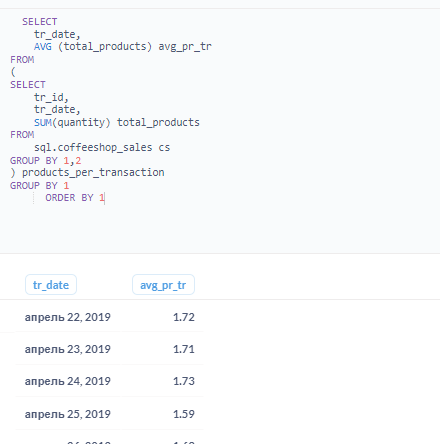

Маркетингу необходимы для анализа данные о клиентах, имеющих карту лояльности. Коллег интересует среднее по сумме чеков за каждый день, которые были оплачены с использованием карты лояльности.Напишите запрос, чтобы вывести необходимые данные. Формат вывода: tr_date, avg_rev_tr. Отсортируйте запрос по столбцу с датой.

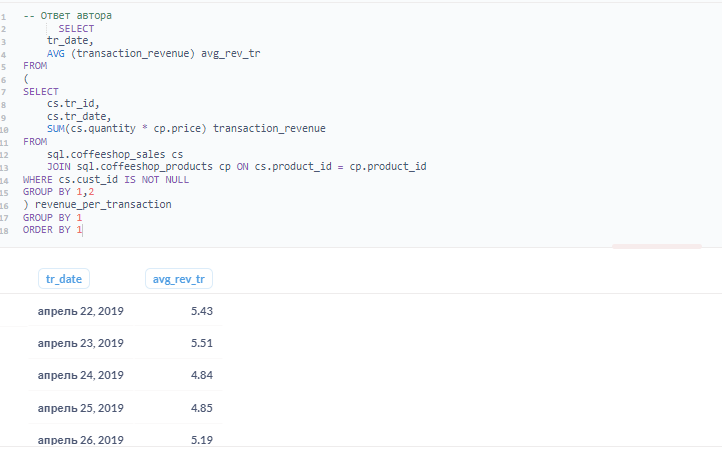